In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/exRNA


In [147]:
import pandas as pd
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression

In [148]:
def knn_score(X, y, K=10):
    N = X.shape[0]
    assert K < N
    nn = NearestNeighbors(K)
    nn.fit(X)
    
    distances, indices = nn.kneighbors(X, K + 1)
    neighbor_classes = np.take(y, indices[:, 1:])
    same_class_fractions = np.sum(neighbor_classes == y[:, np.newaxis], axis=1)
    classes, counts = np.unique(y, return_counts=True)
    classes = np.argmax(y.reshape((-1, 1)) == classes.reshape((1, -1)), axis=1)
    counts = np.take(counts, classes)
    mean_r = K/(N - 1)*counts
    max_r = np.minimum(K, counts)
    scores = (same_class_fractions - mean_r)/(max_r - mean_r)
    #print(scores)
    return scores.mean()

## Read annotation files (from exoRBase)

In [23]:
anno_lncRNA = pd.read_table('data/exoRBase/lncRNA_ann.txt', sep='\t', index_col=0)
anno_mRNA = pd.read_table('data/exoRBase/mRNA_ann.txt', sep='\t', index_col=0)

In [24]:
anno_lncRNA.head()

,Full_name,Chromosome,Start,End,Strand,Length,Gene_type,Genecards,Near_circRNA,Detection_frequency,Expression_rank,Specific_exression_tissue,Specificity_score,Sample_group,Diff_group,Validation,plot
Gene_name,,,,,,,,,,,,,,,,,
RP4-717I23.2,NaN,chr1,93278961,93279129,-,169,long noncoding RNA,http://www.genecards.org/cgi-bin/carddisp.pl?g...,NaN,0.047,20-30%,Nerve,4.906892,"CRC,PAAD",NaN,NaN,boxplot
BEND3P2,BEN domain containing 3 pseudogene 2,chr9,92171241,92173494,+,2254,long noncoding RNA,http://www.genecards.org/cgi-bin/carddisp.pl?g...,NaN,0.059,40-50%,NaN,NaN,"Breast_cancer,Normal,PAAD",NaN,NaN,boxplot
AC137723.5,NaN,chr17,81941869,81947601,+,5733,long noncoding RNA,http://www.genecards.org/cgi-bin/carddisp.pl?g...,NaN,0.024,20-30%,NaN,NaN,PAAD,NaN,NaN,boxplot
AC009404.2,NaN,chr2,117833937,117841658,+,7722,long noncoding RNA,http://www.genecards.org/cgi-bin/carddisp.pl?g...,NaN,0.282,30-40%,NaN,NaN,"Breast_cancer,CRC,HCC,Normal,PAAD",NaN,NaN,boxplot
FLJ20021,uncharacterized LOC90024,chr4,101347780,101348883,+,1104,long noncoding RNA,http://www.genecards.org/cgi-bin/carddisp.pl?g...,NaN,0.741,20-30%,NaN,NaN,"Breast_cancer,CHD,CRC,HCC,Normal,PAAD",NaN,NaN,boxplot


In [25]:
anno_mRNA.head(10)

,Full_name,Chromosome,Start,End,Strand,Length,Gene_type,Genecards,Related_circRNA,Detection_frequency,Expression_rank,Specific_exression_tissue,Specificity_score,Sample_group,Diff_group,Validation,plot
Gene_name,,,,,,,,,,,,,,,,,
TFF2,trefoil factor 2,chr21,42346357,42351128,-,4772,protein-coding RNA,http://www.genecards.org/cgi-bin/carddisp.pl?g...,NaN,0.071,50-60%,Stomach,4.844698,"Breast_cancer,HCC,Normal,PAAD",PAAD(up),NaN,boxplot
ARHGEF18,Rho/Rac guanine nucleotide exchange factor 18,chr19,7395113,7472477,+,77365,protein-coding RNA,http://www.genecards.org/cgi-bin/carddisp.pl?g...,"exo_circ_046380,exo_circ_021280,exo_circ_00564...",1.000,20-30%,NaN,NaN,"Breast_cancer,CHD,CRC,HCC,Normal,PAAD",CHD(up),NaN,boxplot
BANF1,barrier to autointegration factor 1,chr11,66002079,66004149,+,2071,protein-coding RNA,http://www.genecards.org/cgi-bin/carddisp.pl?g...,NaN,1.000,20-30%,NaN,NaN,"Breast_cancer,CHD,CRC,HCC,Normal,PAAD",CRC(down),NaN,boxplot
SHISA7,shisa family member 7,chr19,55428740,55442863,-,14124,protein-coding RNA,http://www.genecards.org/cgi-bin/carddisp.pl?g...,NaN,0.494,70-80%,Brain,2.885398,"Breast_cancer,CHD,CRC,HCC,Normal,PAAD",CRC(up),NaN,boxplot
TMEM189,transmembrane protein 189,chr20,50118254,50153734,-,35481,protein-coding RNA,http://www.genecards.org/cgi-bin/carddisp.pl?g...,"exo_circ_002993,exo_circ_030811",1.000,20-30%,NaN,NaN,"Breast_cancer,CHD,CRC,HCC,Normal,PAAD",CHD(down),NaN,boxplot
SLC44A1,solute carrier family 44 (choline transporter)...,chr9,105244622,105439171,+,194550,protein-coding RNA,http://www.genecards.org/cgi-bin/carddisp.pl?g...,"exo_circ_055777,exo_circ_039381,exo_circ_02537...",1.000,20-30%,NaN,NaN,"Breast_cancer,CHD,CRC,HCC,Normal,PAAD",CHD(down),NaN,boxplot
TUBB4B,tubulin beta 4B class IVb,chr9,137241213,137243707,+,2495,protein-coding RNA,http://www.genecards.org/cgi-bin/carddisp.pl?g...,NaN,1.000,0-10%,NaN,NaN,"Breast_cancer,CHD,CRC,HCC,Normal,PAAD",NaN,NaN,boxplot
APOC2,apolipoprotein C-II,chr19,44946035,44949565,+,3531,protein-coding RNA,http://www.genecards.org/cgi-bin/carddisp.pl?g...,NaN,0.412,60-70%,Liver,4.672363,"CHD,CRC,HCC,Normal,PAAD",HCC(up),NaN,boxplot
LA16c-431H6.6,NaN,chr16,1632259,1686715,+,54457,protein-coding RNA,http://www.genecards.org/cgi-bin/carddisp.pl?g...,NaN,0.929,60-70%,NaN,NaN,"Breast_cancer,CRC,HCC,Normal,PAAD",CHD(down),NaN,boxplot


In [26]:
anno_mRNA.loc['LA16c-431H6.6']

Full_name                                                                  NaN
Chromosome                                                               chr16
Start                                                                  1632259
End                                                                    1686715
Strand                                                                       +
Length                                                                   54457
Gene_type                                                   protein-coding RNA
Genecards                    http://www.genecards.org/cgi-bin/carddisp.pl?g...
Related_circRNA                                                            NaN
Detection_frequency                                                      0.929
Expression_rank                                                         60-70%
Specific_exression_tissue                                                  NaN
Specificity_score                                   

In [11]:
transcript_table = pd.read_table('data/annotation/transcript_table/all.txt', sep='\t')
transcript_table.head()

,chrom,start,end,name,score,strand,gene_id,transcript_id,gene_name,transcript_name,gene_type,transcript_type
0,chr1,14629,14657,piR-hsa-18438,0,+,piR-hsa-18438,piR-hsa-18438,piR-hsa-18438,piR-hsa-18438,piRNA,piRNA
1,chr1,17368,17436,ENSG00000278267.1,0,-,ENSG00000278267.1,ENST00000619216.1,MIR6859-1,MIR6859-1-201,miRNA,miRNA
2,chr1,18535,18563,piR-hsa-7508,0,+,piR-hsa-7508,piR-hsa-7508,piR-hsa-7508,piR-hsa-7508,piRNA,piRNA
3,chr1,26805,26836,piR-hsa-23387,0,-,piR-hsa-23387,piR-hsa-23387,piR-hsa-23387,piR-hsa-23387,piRNA,piRNA
4,chr1,29553,31097,ENSG00000243485.5,0,+,ENSG00000243485.5,ENST00000473358.1,MIR1302-2HG,MIR1302-2HG-202,lncRNA,lncRNA


In [51]:
gene_lengths = pd.Series({gene_id:length for gene_id, length in zip(transcript_table['gene_id'],
                    transcript_table['end'] - transcript_table['start'])})
gene_lengths.head()

10904    93
12954    94
12956    72
12958    82
12960    73
dtype: int64

In [28]:
gene_name_to_gene_id = pd.Series({
    gene_name:gene_id for gene_name, gene_id in zip(transcript_table['gene_name'].values,
                                 transcript_table['gene_id'].values)})

In [29]:
gene_name_to_gene_id.head()

10904    10904
12954    12954
12956    12956
12958    12958
12960    12960
dtype: object

## Read expression matrix (from exoRBase)

In [63]:
tpm_lncRNA = pd.read_table('data/exoRBase/Samples_combined_lncRNA_TPM.txt', sep='\t', index_col=0)
tpm_mRNA = pd.read_table('data/exoRBase/Samples_combined_mRNA_TPM.txt', sep='\t', index_col=0)

In [64]:
print('Number of lncRNA: {}'.format(tpm_lncRNA.shape[0]))
print('Number of mRNA: {}'.format(tpm_mRNA.shape[0]))

Number of lncRNA: 15501
Number of mRNA: 18333


In [65]:
tpm_lncRNA.head()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,...,PAAD10,PAAD11,PAAD12,PAAD13,PAAD14,WhB1,WhB2,WhB3,WhB4,WhB5
GeneID,,,,,,,,,,,,,,,,,,,,,
RP4-717I23.2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,1.903739,1.821614,0.515648,0.208986,0.344974,0.393897,0.475025,0.198693
BEND3P2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.072387,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC137723.5,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.257824,0.000000,0.000000,0.000000,0.000000,0.000000
AC009404.2,0.111254,0.000000,0.000000,0.0,0.000000,0.151692,0.000000,0.000000,1.501800,0.082440,...,0.00000,0.000000,0.000000,3.187825,5.156478,1.515145,1.954851,1.907292,2.248450,1.768366
FLJ20021,0.222508,0.590937,0.379699,0.0,1.308975,0.151692,1.375354,3.027818,1.621944,1.401482,...,0.77388,0.528785,1.644138,0.000000,0.515648,0.835942,0.574956,0.601212,1.013386,0.695425


In [66]:
tpm_mRNA.head()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,...,PAAD10,PAAD11,PAAD12,PAAD13,PAAD14,WhB1,WhB2,WhB3,WhB4,WhB5
GeneID,,,,,,,,,,,,,,,,,,,,,
TFF2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.289800,0.000000,0.432668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ARHGEF18,22.584559,24.110223,19.098836,49.445112,32.135329,9.531295,38.509907,50.143615,29.795708,11.170633,...,37.877124,35.861231,61.871512,44.629551,31.067779,40.752179,45.249048,45.194524,54.881188,41.804958
BANF1,13.795494,48.220447,16.630795,39.840666,19.765518,7.887968,22.005661,38.549288,13.456126,8.326450,...,14.101812,12.113982,32.363560,32.219803,39.447055,7.157754,10.176724,8.437693,8.455440,6.815162
SHISA7,0.111254,0.472749,0.151879,0.000000,0.654487,0.151692,0.000000,0.369246,1.141368,0.000000,...,0.000000,0.000000,0.086534,0.113851,0.386736,0.679203,0.919930,0.621943,0.665035,0.814640
TMEM189,43.834070,23.755661,51.069451,10.849467,15.576799,64.620663,38.111778,19.717739,30.576644,33.800439,...,16.337465,19.180471,24.748605,36.318435,53.627369,10.397030,10.981662,14.346152,15.612479,11.007579


In [67]:
gene_ids_mRNA = gene_name_to_gene_id[tpm_mRNA.index.values]
gene_ids_mRNA = gene_ids_mRNA[~gene_ids_mRNA.isna()]
tpm_mRNA = tpm_mRNA.loc[gene_ids_mRNA.index.values]
tpm_mRNA.index = gene_ids_mRNA.values

gene_ids_lncRNA = gene_name_to_gene_id[tpm_lncRNA.index.values]
gene_ids_lncRNA = gene_ids_lncRNA[~gene_ids_lncRNA.isna()]
tpm_lncRNA = tpm_lncRNA.loc[gene_ids_lncRNA.index.values]
tpm_lncRNA.index = gene_ids_lncRNA.values

In [68]:
tpm_exorbase = pd.concat([tpm_mRNA, tpm_lncRNA], axis=0)
tpm_exorbase.head()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,...,PAAD10,PAAD11,PAAD12,PAAD13,PAAD14,WhB1,WhB2,WhB3,WhB4,WhB5
ENSG00000160181.8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.289800,0.000000,0.432668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000104880.17,22.584559,24.110223,19.098836,49.445112,32.135329,9.531295,38.509907,50.143615,29.795708,11.170633,...,37.877124,35.861231,61.871512,44.629551,31.067779,40.752179,45.249048,45.194524,54.881188,41.804958
ENSG00000175334.7,13.795494,48.220447,16.630795,39.840666,19.765518,7.887968,22.005661,38.549288,13.456126,8.326450,...,14.101812,12.113982,32.363560,32.219803,39.447055,7.157754,10.176724,8.437693,8.455440,6.815162
ENSG00000187902.11,0.111254,0.472749,0.151879,0.000000,0.654487,0.151692,0.000000,0.369246,1.141368,0.000000,...,0.000000,0.000000,0.086534,0.113851,0.386736,0.679203,0.919930,0.621943,0.665035,0.814640
ENSG00000240849.10,43.834070,23.755661,51.069451,10.849467,15.576799,64.620663,38.111778,19.717739,30.576644,33.800439,...,16.337465,19.180471,24.748605,36.318435,53.627369,10.397030,10.981662,14.346152,15.612479,11.007579


In [69]:
print('Number of lncRNA: {}'.format(tpm_lncRNA.shape[0]))
print('Number of mRNA: {}'.format(tpm_mRNA.shape[0]))

Number of lncRNA: 2387
Number of mRNA: 17642


## Map SRR IDs to Sample names

In [78]:
sra_id_to_sample_name = []
for gse_id, sample_class in [('GSE100206', 'Healty'),
                             ('GSE100207', 'HCC'),
                             ('GSE100063', 'CRC'),
                             ('GSE99985', 'CHD'),
                             ('GSE100232', 'PAAD')]:
    metadata = pd.read_excel('metadata/Published_Plasma_exRNA.xlsx', gse_id)
    sra_id_to_sample_name.append(pd.Series(metadata['Sample_name'].values,
        index=metadata['Accession_SRR'].values))
sra_id_to_sample_name = pd.concat(sra_id_to_sample_name)
sra_id_to_sample_name = sra_id_to_sample_name.dropna()
sra_id_to_sample_name.head()

SRR5712482    N1
SRR5712483    N2
SRR5712484    N3
SRR5712485    N4
SRR5712486    N5
dtype: object

## Read expression matrix (remapped)

In [142]:
counts_remap = pd.read_csv('/home/chenxupeng/projects/training/data/exoRBase_remap.csv', index_col=0)
# get gene ids
counts_remap.index = counts_remap.index.to_series().str.split('|', expand=True).iloc[:, 1].values
#counts_remap.columns = sra_id_to_sample_name[counts_remap.columns.values]
counts_remap.head()

,SRR5679904,SRR5679905,SRR5679906,SRR5679907,SRR5679908,SRR5687235,SRR5687236,SRR5687237,SRR5687238,SRR5687239,...,SRR5714909,SRR5714910,SRR5714911,SRR5714912,SRR5714913,SRR5714914,SRR5714915,SRR5714916,SRR5714917,SRR5714918
ENSG00000243485.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000237613.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000238009.6,0,0,0,3,0,6,1,5,0,1,...,0,2,6,0,3,67,0,14,139,0
ENSG00000239945.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000239906.1,0,0,1,31,3,0,3,0,5,1,...,0,0,0,0,0,0,0,0,0,0


In [143]:
counts_remap.to_csv('output/count_matrix/exoRBase_remapped.txt', sep='\t', header=True, index=True)

In [146]:
cpm_remap = 1e6*counts_remap/counts_remap.sum(axis=0)
cpm_remap.to_csv('output/cpm_matrix/exoRBase_remapped.txt', sep='\t', header=True, index=True)

In [50]:
print('Number of RNAs: {}'.format(counts_remap.shape[0]))
print('Number of samples: {}'.format(counts_remap.shape[1]))

Number of RNAs: 95075
Number of samples: 81


In [55]:
rpk_remap = 1e3*counts_remap.div(gene_lengths[counts_remap.index.values], axis=0)
tpm_remap = 1e6*rpk_remap.div(rpk_remap.sum(axis=0), axis=1)

In [57]:
tpm_remap.head()

,SRR5679904,SRR5679905,SRR5679906,SRR5679907,SRR5679908,SRR5687235,SRR5687236,SRR5687237,SRR5687238,SRR5687239,...,SRR5714909,SRR5714910,SRR5714911,SRR5714912,SRR5714913,SRR5714914,SRR5714915,SRR5714916,SRR5714917,SRR5714918
ENSG00000243485.5,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0
ENSG00000237613.2,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0
ENSG00000238009.6,0.0,0.0,0.00000,0.141892,0.000000,0.386714,0.086485,0.225885,0.000000,0.110986,...,0.0,0.088364,0.479847,0.0,0.175255,2.26319,0.0,0.300732,4.107632,0.0
ENSG00000239945.1,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0
ENSG00000239906.1,0.0,0.0,0.45526,11.959028,1.382593,0.000000,2.116217,0.000000,3.018106,0.905242,...,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0


In [80]:
tpm_remap.columns = sra_id_to_sample_name[tpm_remap.columns.values]
tpm_remap.head()

,CHD1,CHD2,CHD3,CHD4,CHD5,CRC1,CRC2,CRC3,CRC4,CRC5,...,PAAD2,PAAD3,PAAD4,PAAD5,PAAD6,PAAD7,PAAD8,PAAD9,PAAD10,PAAD11
ENSG00000243485.5,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0
ENSG00000237613.2,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0
ENSG00000238009.6,0.0,0.0,0.00000,0.141892,0.000000,0.386714,0.086485,0.225885,0.000000,0.110986,...,0.0,0.088364,0.479847,0.0,0.175255,2.26319,0.0,0.300732,4.107632,0.0
ENSG00000239945.1,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0
ENSG00000239906.1,0.0,0.0,0.45526,11.959028,1.382593,0.000000,2.116217,0.000000,3.018106,0.905242,...,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0


## Correlation between exoRBase TPM and remapped TPM

In [104]:
common_genes = np.intersect1d(tpm_remap.index.values, tpm_exorbase.index.values)
common_samples = np.intersect1d(tpm_remap.columns.values, tpm_exorbase.columns.values)

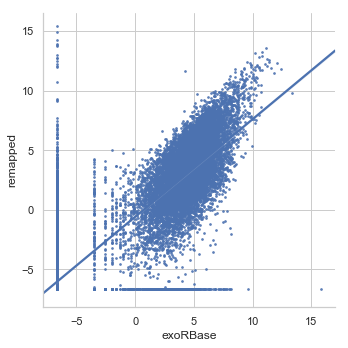

In [130]:
plot_data = pd.DataFrame({'exoRBase': np.log2(tpm_exorbase.loc[common_genes, 'CHD1'] + 0.01),
                          'remapped': np.log2(tpm_remap.loc[common_genes, 'CHD1'] + 0.01)})
g = sns.lmplot('exoRBase', 'remapped', data=plot_data, scatter_kws={'s': 3})

In [198]:
from scipy.stats import pearsonr, spearmanr

log_pearsonrs = np.zeros(len(common_samples))
pearsonrs = np.zeros(len(common_samples))
spearmanrs = np.zeros(len(common_samples))
for i, sample_id in enumerate(common_samples):
    x1 = tpm_exorbase.loc[common_genes, sample_id]
    x2 = tpm_remap.loc[common_genes, sample_id]
    indices = np.nonzero((~np.isclose(x1, 0)) | (~np.isclose(x1, 0)))[0]
    x1 = x1[indices]
    x2 = x2[indices]
    log_pearsonrs[i] = pearsonr(np.log2(x1 + 0.001), np.log2(x2 + 0.001))[0]
    pearsonrs[i] = pearsonr(x1, x2)[0]
    spearmanrs[i] = spearmanr(x1, x2)[0]
pearsonrs = pd.Series(pearsonrs, index=common_samples)
log_pearsonrs = pd.Series(log_pearsonrs, index=common_samples)
spearmanrs = pd.Series(spearmanrs, index=common_samples)

(0, 1)

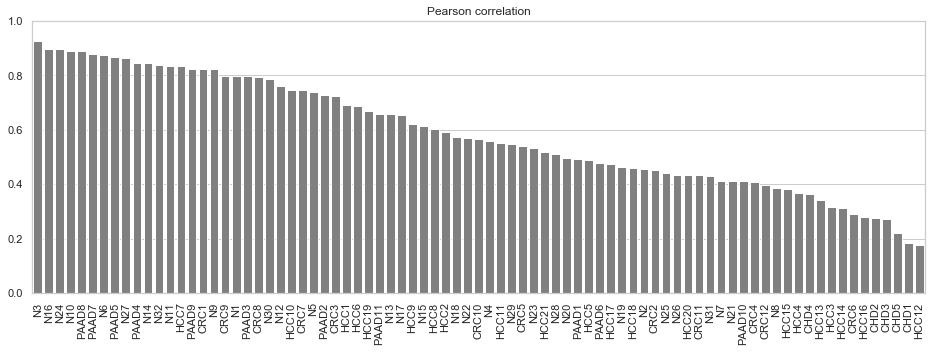

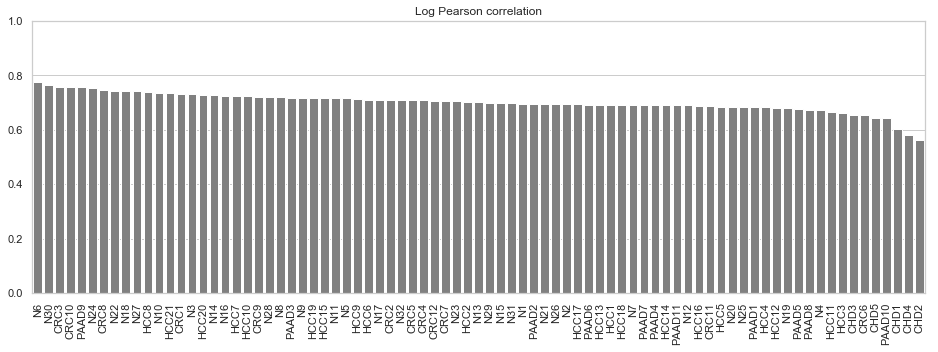

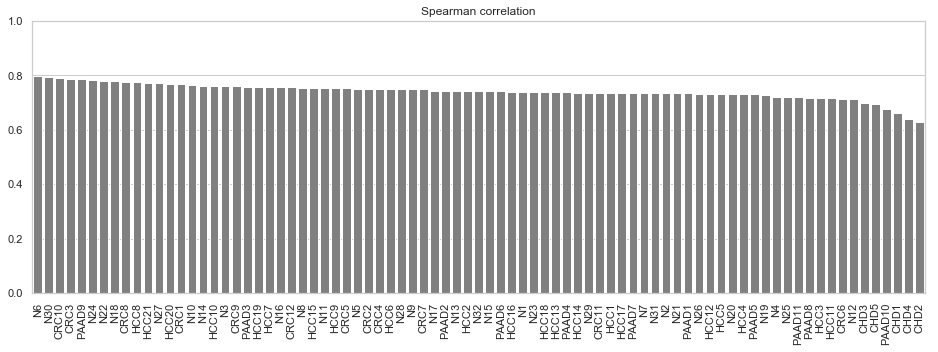

In [200]:
fig, ax = plt.subplots(figsize=(16, 5))
orders = np.argsort(-pearsonrs.values)
sns.barplot(x=pearsonrs[orders].index.values, 
            y=pearsonrs[orders].values,
            color='grey', ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Pearson correlation')
ax.set_ylim(0, 1)

fig, ax = plt.subplots(figsize=(16, 5))
orders = np.argsort(-log_pearsonrs.values)
sns.barplot(x=log_pearsonrs[orders].index.values, 
            y=log_pearsonrs[orders].values,
            color='grey', ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Log Pearson correlation')
ax.set_ylim(0, 1)

fig, ax = plt.subplots(figsize=(16, 5))
orders = np.argsort(-spearmanrs.values)
sns.barplot(x=spearmanrs[orders].index.values, 
            y=spearmanrs[orders].values,
            color='grey', ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Spearman correlation')
ax.set_ylim(0, 1)

In [131]:
df = pd.read_table('output/count_matrix/exoRBase.txt', sep='\t', index_col=0)
df.head()

,SRR5712482,SRR5712483,SRR5712484,SRR5712485,SRR5712486,SRR5712487,SRR5712488,SRR5712489,SRR5712490,SRR5712491,...,SRR5714912,SRR5714913,SRR5714914,SRR5714915,SRR5714916,SRR5714917,SRR5714918,SRR5714919,SRR5714920,SRR5714921
transcript,,,,,,,,,,,,,,,,,,,,,
ENST00000473358.1|MIR1302-2HG-202|1544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENST00000469289.1|MIR1302-2HG-201|843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENST00000417324.1|FAM138A-201|1528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
ENST00000466430.5|AL627309.1-201|31638,4,2,4,0,0,12,5,27,11,2,...,0,16,18,0,25,2,0,29,13,10
ENST00000471248.1|AL627309.1-203|18221,0,0,0,0,0,0,2,2,0,1,...,0,1,1,0,0,0,0,1,2,6


In [134]:
names, counts = np.unique(df.index, return_counts=True)
print(names[counts > 1])

['ENST00000607781.1|RN7SL832P-201|1756']


In [138]:
df.iloc[df.index == 'ENST00000607781.1|RN7SL832P-201|1756']

,SRR5712482,SRR5712483,SRR5712484,SRR5712485,SRR5712486,SRR5712487,SRR5712488,SRR5712489,SRR5712490,SRR5712491,...,SRR5714912,SRR5714913,SRR5714914,SRR5714915,SRR5714916,SRR5714917,SRR5714918,SRR5714919,SRR5714920,SRR5714921
transcript,,,,,,,,,,,,,,,,,,,,,
ENST00000607781.1|RN7SL832P-201|1756,1,6,1,0,0,0,0,0,0,2,...,0,3,0,0,0,2,0,7,0,6
ENST00000607781.1|RN7SL832P-201|1756,49,77,43,23,62,246,78,148,67,183,...,28,74,34,37,127,115,162,144,248,723


In [135]:
transcript_table.head()

,chrom,start,end,name,score,strand,gene_id,transcript_id,gene_name,transcript_name,gene_type,transcript_type
0,chr1,14629,14657,piR-hsa-18438,0,+,piR-hsa-18438,piR-hsa-18438,piR-hsa-18438,piR-hsa-18438,piRNA,piRNA
1,chr1,17368,17436,ENSG00000278267.1,0,-,ENSG00000278267.1,ENST00000619216.1,MIR6859-1,MIR6859-1-201,miRNA,miRNA
2,chr1,18535,18563,piR-hsa-7508,0,+,piR-hsa-7508,piR-hsa-7508,piR-hsa-7508,piR-hsa-7508,piRNA,piRNA
3,chr1,26805,26836,piR-hsa-23387,0,-,piR-hsa-23387,piR-hsa-23387,piR-hsa-23387,piR-hsa-23387,piRNA,piRNA
4,chr1,29553,31097,ENSG00000243485.5,0,+,ENSG00000243485.5,ENST00000473358.1,MIR1302-2HG,MIR1302-2HG-202,lncRNA,lncRNA


In [136]:
transcript_table.query('transcript_id == "ENST00000607781.1"')

,chrom,start,end,name,score,strand,gene_id,transcript_id,gene_name,transcript_name,gene_type,transcript_type
487422,chr2,10690343,10692099,ENSG00000243819.4,0,+,ENSG00000243819.4,ENST00000607781.1,RN7SL832P,RN7SL832P-201,lncRNA,lncRNA
487423,chr2,10690343,10692099,ENSG00000243819.4,0,+,ENSG00000243819.4,ENST00000607781.1,RN7SL832P,RN7SL832P-201,srpRNA,srpRNA


## PCA plots of different preprocessing methods

In [149]:
sample_classes = pd.read_table('metadata/sample_classes.exoRBase.txt', sep='\t', 
                               header=None, index_col=0).iloc[:, 0]
sample_classes.head()

0
SRR5712482    Healthy
SRR5712483    Healthy
SRR5712484    Healthy
SRR5712485    Healthy
SRR5712486    Healthy
Name: 1, dtype: object

In [150]:
np.unique(sample_classes)

array(['CHD', 'CRC', 'HCC', 'Healthy', 'PAAD'], dtype=object)

In [179]:
cpm2.head()

,SRR5679904,SRR5679905,SRR5679906,SRR5679907,SRR5679908,SRR5687235,SRR5687236,SRR5687237,SRR5687238,SRR5687239,...,SRR5714909,SRR5714910,SRR5714911,SRR5714912,SRR5714913,SRR5714914,SRR5714915,SRR5714916,SRR5714917,SRR5714918
ENSG00000238009.6,0.000000,0.0,0.000000,0.334340,0.000000,0.946179,0.189900,0.518707,0.000000,0.239062,...,0.000000,0.190882,1.10652,0.000000,0.336475,5.059214,0.000000,0.666437,8.084224,0.000000
ENSG00000239906.1,0.000000,0.0,0.131829,3.454845,0.410283,0.000000,0.569699,0.000000,0.802757,0.239062,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000241860.6,0.000000,0.0,4.350351,0.000000,0.000000,1.419269,1.139397,1.348638,0.802757,1.434372,...,0.077421,0.000000,0.36884,0.000000,0.000000,0.755107,3.324802,1.094861,0.000000,0.000000
ENSG00000237491.8,0.096582,0.0,0.000000,0.000000,0.000000,2.365448,0.000000,0.622448,0.481654,0.717186,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000228794.8,2.607723,0.0,27.947712,2.563272,23.522873,4.573199,7.975779,9.959173,14.128523,9.323421,...,12.774397,4.676616,0.00000,4.522243,8.411881,3.171448,3.799773,2.142120,26.230108,6.242628


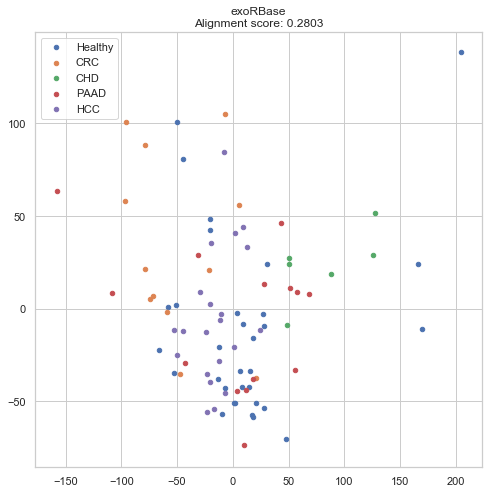

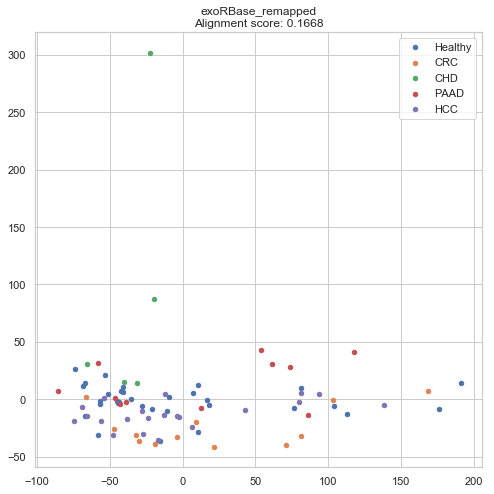

In [193]:
for dataset in ['exoRBase', 'exoRBase_remapped']:
    cpm2 = pd.read_table('output/cpm_matrix/{}.txt'.format(dataset), sep='\t', index_col=0)
    #cpm2 = cpm2.drop(columns=['SRR5679905', 'SRR5679907'])
    cpm2 = cpm2.iloc[np.mean(~np.isclose(cpm2, 0), axis=1) > 0.2]
    sample_ids = cpm2.columns
    m = cpm2
    X = np.log2(m + 0.001).T
    X = StandardScaler().fit_transform(X)
    pca = PCA()
    #pca = TSNE()
    X_pca = pca.fit_transform(X)

    fig, ax = plt.subplots(figsize=(8, 8))
    for label in ['Healthy', 'CRC', 'CHD', 'PAAD', 'HCC']:
        indices = np.nonzero(sample_classes[sample_ids] == label)[0]
        ax.scatter(X_pca[indices, 0], X_pca[indices, 1], s=20, label=label)
    ax.legend()
    _ = ax.set_title('{}\nAlignment score: {:.4f}'.format(dataset, knn_score(X_pca, sample_classes[sample_ids].values)))

In [186]:
from scipy.spatial.distance import pdist, squareform
mean_dist = pd.Series(np.mean(squareform(pdist(X)), axis=1), index=cpm2.columns.values)
mean_dist = mean_dist.sort_values(ascending=False)
mean_dist.head(10)

SRR5679907    276.811040
SRR5712511    255.074569
SRR5714911    247.075902
SRR5687243    240.292072
SRR5712487    239.988728
SRR5679904    235.019254
SRR5714918    228.465058
SRR5712485    225.689483
SRR5714915    224.205896
SRR5712523    223.232169
dtype: float64

In [187]:
np.argmax(X_pca[:, 1])

2

In [188]:
cpm2.columns

Index(['SRR5679904', 'SRR5679906', 'SRR5679907', 'SRR5679908', 'SRR5687235',
       'SRR5687236', 'SRR5687237', 'SRR5687238', 'SRR5687239', 'SRR5687240',
       'SRR5687241', 'SRR5687242', 'SRR5687243', 'SRR5687244', 'SRR5687245',
       'SRR5687246', 'SRR5712482', 'SRR5712483', 'SRR5712484', 'SRR5712485',
       'SRR5712486', 'SRR5712487', 'SRR5712488', 'SRR5712489', 'SRR5712490',
       'SRR5712491', 'SRR5712492', 'SRR5712493', 'SRR5712494', 'SRR5712495',
       'SRR5712496', 'SRR5712497', 'SRR5712498', 'SRR5712499', 'SRR5712500',
       'SRR5712501', 'SRR5712502', 'SRR5712503', 'SRR5712504', 'SRR5712505',
       'SRR5712506', 'SRR5712507', 'SRR5712508', 'SRR5712509', 'SRR5712510',
       'SRR5712511', 'SRR5712512', 'SRR5712513', 'SRR5712516', 'SRR5712517',
       'SRR5712518', 'SRR5712519', 'SRR5712520', 'SRR5712521', 'SRR5712522',
       'SRR5712523', 'SRR5712524', 'SRR5712525', 'SRR5712526', 'SRR5712527',
       'SRR5712528', 'SRR5712529', 'SRR5712530', 'SRR5712531', 'SRR5712532',

In [194]:
X.shape

(81, 20349)